1. Implement linear regression and gradient descent from scratch
2. Do linear regression with libraries

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [26]:
df = pd.read_csv('data/titanic.csv')

In [31]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [28]:
df["Age"] = df["Age"].fillna(df["Age"].mean())

In [29]:
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

In [30]:
df.drop(columns=['Cabin'], inplace=True)

## Split dataset for simple linear regression

In [43]:
X = df['Age'].values.reshape(-1, 1)
y = df['Fare'].values

<Axes: >

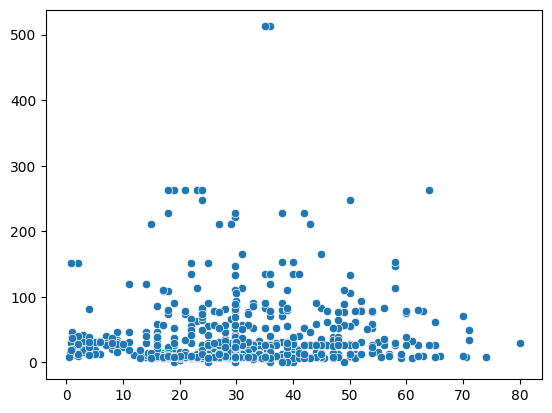

In [47]:
sns.scatterplot(x=X.flatten(), y=y)

## Linear Regression From Scratch

In [ ]:
# class SimpleLinearRegression:

In [48]:
def fit_linear_regression(X, y):
    X_mean = np.mean(X)
    y_mean = np.mean(y)

    numerator = np.sum((X-X_mean) * (y-y_mean))
    denominator = np.sum((X-X_mean) ** 2)

    slope = numerator / denominator

    intercept = y_mean - slope * X_mean

    return slope, intercept

In [49]:
def predict_linear_regression(X, slope, intercept):
    return intercept + slope * X

In [55]:
scratch_slope, scratch_intercept = fit_linear_regression(X, y)

scratch_predictions = predict_linear_regression(X, scratch_slope, scratch_intercept)

In [57]:
sklearn_model = LinearRegression()

sklearn_model.fit(X, y)

sklearn_predictions = sklearn_model.predict(X)

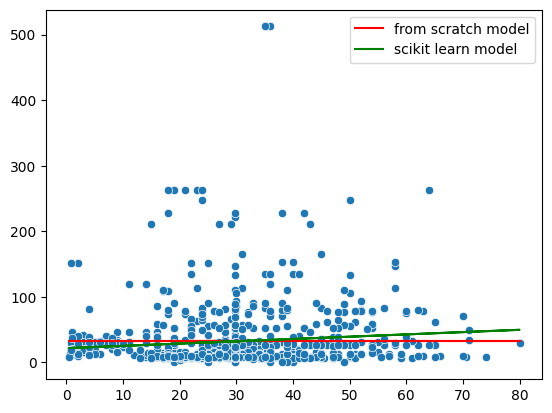

In [59]:
sns.scatterplot(x=X.flatten(), y=y)
plt.plot(X, scratch_predictions, color='red', label="from scratch model")
plt.plot(X, sklearn_predictions, color='green', label='scikit learn model')
plt.legend()

In [60]:
scratch_mse = mean_squared_error(y, scratch_predictions)
scratch_r2 = r2_score(y, scratch_predictions)

sklearn_mse = mean_squared_error(y, sklearn_predictions)
sklearn_r2 = r2_score(y, sklearn_predictions)

In [61]:
scratch_mse, sklearn_mse

(2466.665311685043, 2445.983927761612)

In [62]:
scratch_r2, sklearn_r2

(0.0, 0.00838434943948796)

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)